In [1]:
import numpy as np
import spectral_embedding as se
import matplotlib as mpl
import matplotlib.pyplot as plt

In this example we demostrate unfolded adjacency spectral embedding for a series of stochastic block models and investigate the stability of the embedding compared to two other possible approaches; omnibus embedding and separate adjacency spectral embedding.

In [2]:
np.random.seed(0)

We generate a dynamic stochastic block model over $T = 2$ time periods with $n=1000$ nodes and $K=4$ communities, where nodes are equally likely to be in either community, $\pi = (0.25, 0.25, 0.25, 0.25)$. We use the following two community link probability matrices for the two time periods,
$$
    \textbf{B}^{(1)} = \left( \begin{array}{cccc}
        0.08 & 0.02 & 0.18 & 0.10 \\
        0.02 & 0.20 & 0.04 & 0.10 \\
        0.18 & 0.04 & 0.02 & 0.02 \\
        0.10 & 0.10 & 0.02 & 0.06
    \end{array} \right), \quad
    \textbf{B}^{(2)} = \left( \begin{array}{cccc}
        0.16 & 0.16 & 0.04 & 0.10 \\
        0.16 & 0.16 & 0.04 & 0.10 \\
        0.04 & 0.04 & 0.09 & 0.02 \\
        0.10 & 0.10 & 0.02 & 0.06
    \end{array} \right).
$$
In the first time period, the four communities are all behaving in different ways and spectral embedding should be able to distinguish between the groups. In the second time period, communities 1 and 2 have the same link probabilities to all the other communities, so it is desirable that those nodes are embedded in the same way at this time. This is known as cross-sectional stability. Furthermore, community 4 has the same community link probabilities at time 1 and time 2, so it is desirable that these nodes are embedded in the same way between the two time periods. This is known as longitudinal stability.

In [3]:
K = 4
T = 2
n = 1000
pi = np.repeat(1/K, K)

Bs = np.array([[[0.08, 0.02, 0.18, 0.10],
                [0.02, 0.20, 0.04, 0.10],
                [0.18, 0.04, 0.02, 0.02],
                [0.10, 0.10, 0.02, 0.06]],
               [[0.16, 0.16, 0.04, 0.10],
                [0.16, 0.16, 0.04, 0.10],
                [0.04, 0.04, 0.09, 0.02],
                [0.10, 0.10, 0.02, 0.06]]])

In [4]:
As, Z = se.generate_SBM_dynamic(n, Bs, pi)

Colour the nodes depending on their community assignment.

In [5]:
colours = np.array(list(mpl.colors.TABLEAU_COLORS.keys())[0:K])
Zcol = colours[Z]

#### Unfolded adjacency spectral embedding

Embed the nodes into four dimensions by looking at the right embedding of the unfolded adjacency matrix $\textbf{A} = (\textbf{A}^{(1)} | \textbf{A}^{(2)})$. Since the network is a dynamic stochastic model, we can compute the asymptotic distribution for the embedding as a Gaussian mixture model in both time periods.

Note that in all the diagrams that follow, only the first two dimensions of the embeddings are shown for visualisation purposes.

In [6]:
_, YAs_UASE = se.UASE(As, K)
Ys_UASE, SigmaYs_UASE = se.SBM_dynamic_distbn(As, Bs, Z, pi, K)

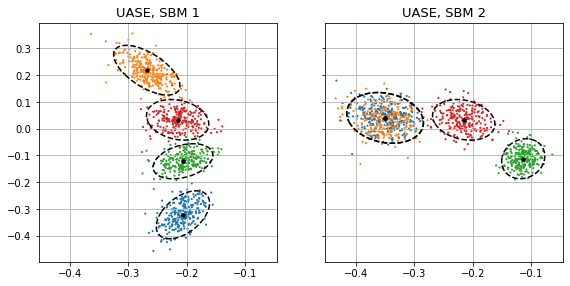

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(9.4,4.4), sharex=True, sharey=True)

for t in range(T):
    axs[t].grid()
    axs[t].scatter(YAs_UASE[t,:,0], YAs_UASE[t,:,1], marker='.', s=5, c=Zcol)
    axs[t].scatter(Ys_UASE[t,:,0], Ys_UASE[t,:,1], marker='o', s=12, c='black')
    
    for i in range(K):
        ellipse = se.gaussian_ellipse(Ys_UASE[t,i], SigmaYs_UASE[t,i][0:2,0:2]/n)
        axs[t].plot(ellipse[0], ellipse[1],'--', color='black')
        
    axs[t].set_title('UASE, SBM ' + str(t+1), fontsize=13);

Note that the Gaussian distributions for communities 1 and 2 (shown in blue and orange) at time 2 are identical demonstrating cross-sectional stability. Also, the Gaussian distribution for community 4 (shown in red) is the same at times 1 and 2 demonstrating longitudinal stability.

#### Omnibus embedding

Embed the nodes into four dimensions using the omnibus matrix,
$$
    \tilde{\textbf{A}} = \left( \begin{array}{cc}
        \textbf{A}^{(1)} & \frac{1}{2}(\textbf{A}^{(1)} + \textbf{A}^{(2)}) \\
        \frac{1}{2}(\textbf{A}^{(1)} + \textbf{A}^{(2)}) & \textbf{A}^{(2)}
    \end{array} \right).
$$
For this technique, we do not have results about the asymptotic distribution of the embedding. However, we can still say something about the stability of the embedding.

In [8]:
YAs_omni = se.omnibus(As, K)

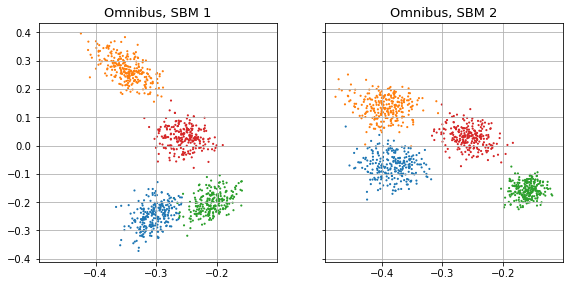

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(9.4,4.4), sharex=True, sharey=True)

for t in range(T):
    axs[t].grid()
    axs[t].scatter(YAs_omni[t,:,0], YAs_omni[t,:,1], marker='.', s=5, c=Zcol)
    axs[t].set_title('Omnibus, SBM ' + str(t+1), fontsize=13);

Community 4 (shown in red) is approximately in the same position over the two time periods suggesting longitudinal stability, but communities 1 and 2 (shown in blue and orange) at time 2 do not have the same distribution, so no cross-sectional stability.

#### Separate adjacency spectral embedding

Finally, we can always compute the spectral embedding for the adjacency matrix at each time period separately. However, since there is a choice of singular vectors in a singular value decomposition, there is no possible way these embeddings can be consistent over time, so no longitudinal stability. However, in this section we show that adjacency spectral embedding has cross-sectional stability.

Note that, while the matrix $\textbf{B}^{(1)}$ has rank 4, the matrix $\textbf{B}^{(2)}$ has rank 3, due to the repeated rows caused by communities 1 and 2. Therefore, we need to embed the adjacency matrices into different numbers of dimensions. For example, if we tried to embed $\textbf{A}^{(2)}$ into four dimensions, we find that the covariance matrices for the asymptotic Gaussian distributions are degenerate.

In [10]:
d = [4,3]
YAs_ASE = [se.ASE(As[0], d[0]), se.ASE(As[1], d[1])]

In [11]:
Y1_ASE, SigmaY1_ASE = se.SBM_distbn(As[0], Bs[0], Z, pi, d[0])
Y2_ASE, SigmaY2_ASE = se.SBM_distbn(As[1], Bs[1], Z, pi, d[1])

Ys_ASE = [Y1_ASE, Y2_ASE]
SigmaYs_ASE = [SigmaY1_ASE, SigmaY2_ASE]

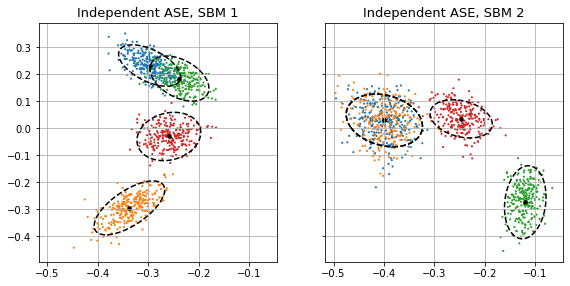

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(9.4,4.4), sharex=True, sharey=True)

for t in range(T):
    axs[t].grid()
    axs[t].scatter(YAs_ASE[t][:,0], YAs_ASE[t][:,1], marker='.', s=5, c=Zcol)
    axs[t].scatter(Ys_ASE[t][:,0], Ys_ASE[t][:,1], marker='o', s=12, c='black')
    
    for i in range(K):
        ellipse = se.gaussian_ellipse(Ys_ASE[t][i], SigmaYs_ASE[t][i][0:2,0:2]/n)
        axs[t].plot(ellipse[0], ellipse[1],'--', color='black')
        
    axs[t].set_title('Independent ASE, SBM ' + str(t+1), fontsize=13);

At time 2, we see that communities 1 and 2 (shown in blue and orange) have the same distribution, so we have cross-sectional stability.